# Data Arts Module 1: Coincidence, correlation, causation

To prepare for this mission, first collect a week's worth of data on two quantifiable phenomena in your life, such as hours of sleep and typing rate. Collect the data with as little variation as possible to reduce confounds. 

For this example, we will randomly generate sleep data for 2 months from a normal distribution, with an average of 8 hours and a standard deviation of 2 hours. The next cell will update the tools that let us install libraries.

Let's generate the dummy data:

In [1]:
from datetime import date, timedelta  # This helps us create dates and calculate the difference between dates (delta)
import random  # This is to generate random numbers
import numpy as np  # This is to use logs

d1 = date(2017, 5, 1)  # Our experiment start date
d2 = date(2017, 7, 1)  # Our experiment end date

# Get datetime objects for each day. This iteratively adds dates on to the first date, up till the second date.
collection_dates = [d1 + timedelta(days=i) for i in range((d2 - d1).days + 1)]

# Create list of days with generated sleep hours. We are choosing sleep hours randomly in a set range.
sleep_hours = [random.normalvariate(8, 2) for i in range(len(collection_dates))]

# Generate pullups for each day increasing the distribution logarithmically.
pullups = 10  # start average of pullups
num_pullups = []
for i in range(len(collection_dates)):
    num_pullups.append(int(random.normalvariate(pullups + np.log(i+1), .5)))

We will now import Python's data analysis library `pandas`. With `pandas`, we can read our data from a CSV (comma separated value) file that may have been exported from Excel or Google Sheets. Since we've generated our data here, we'll just assign the data directly into a data frame. We also import an external library for Python called Bokeh. This library contains powerful tools for data visualization.

In [2]:
import pandas as pd  # A data analysis library
import bokeh as bkeh 
from bokeh.plotting import figure, show, output_file
from bokeh.palettes import brewer
from bokeh.layouts import column
from bokeh.io import show, output_file
from bokeh.io import output_notebook

output_notebook()

df= pd.DataFrame({'Hours of Sleep': sleep_hours,
                    'Number of Pullups': num_pullups},
                    index=collection_dates)

Loading BokehJS ...

If you've worked with any statistical software before, a `pandas` data frame likely functions very similarly. It is a Python object that works like a table. Let's look at it:

In [3]:
df #In a notebook, if you simply put the name of a variable in a cell, it will get printed. 

,Hours of Sleep,Number of Pullups
2017-05-01,5.122317,9
2017-05-02,9.220573,10
2017-05-03,8.111121,11
2017-05-04,8.874407,11
2017-05-05,8.920814,12
2017-05-06,5.603788,11
2017-05-07,6.306903,11
2017-05-08,7.601203,12
2017-05-09,8.685331,11
2017-05-10,12.134581,12


Great! It read in our data and assigned our observations to dates. `pandas` also provides an easy plotting method, simply `plot`:

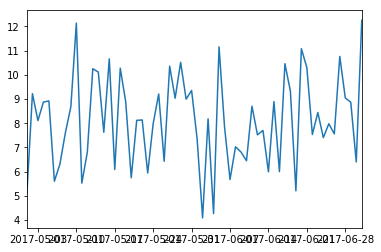

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt  # Python's plotting library
import seaborn as sns  # Makes matplotlib prettier

df['Hours of Sleep'].plot()

That's a good start! But our x-axis is all blended together. We'll have to add in "parameters" to tell `pandas` more specific details about how our chart should look. Let's first use `rot` to rotate the labels:

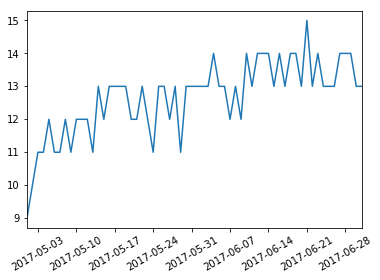

In [5]:
df['Number of Pullups'].plot(rot=30)

`rot=30` rotated our x-axis labels by 30 degrees. Now it's legible. Try adding a `title` to your plot below. If you can't guess the name of the parameter, try looking at the [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) for the `plot` method.

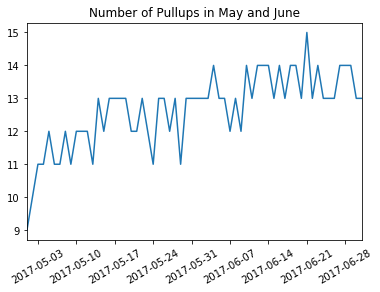

In [6]:
## CHALLENGE

## SOLUTION
df['Number of Pullups'].plot(rot=30, title='Number of Pullups in May and June')

Now feel free to experiment with plotting the other data you've collected!

In [7]:
## EXPLORATION

So how can we plot everything at once? Well that's actually easier, we just tell `pandas` to plot the whole dataframe:

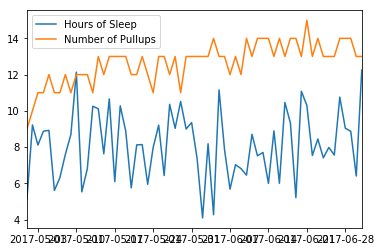

In [8]:
df.plot()

Now try adding in parameters to clean this up. To change colors, look at the `colormap` parameters, possible options are [here](# https://matplotlib.org/examples/color/colormaps_reference.html).

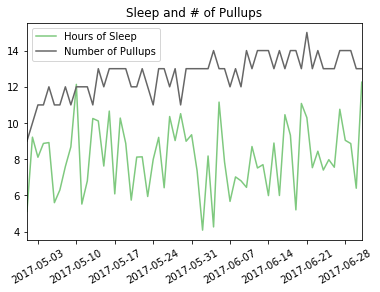

In [9]:
## CHALLENGE


## POSSIBLE SOLUTION
df.plot(kind='line', rot=30, title='Sleep and # of Pullups', colormap="Accent")

Can we make subplots for each variable?

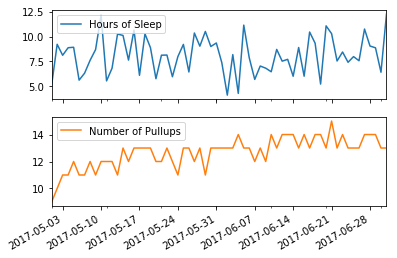

In [10]:
## CHALLENGE

## SOLUTION
ax = df.plot(kind='line', rot=30, subplots=True)

Now let's take a look at dummy data that has a correlation. Try to see how the graphs are different from the uncorrelated ones above. We are first going to generate the sleep data in the same manner as before.

In [11]:
d1 = date(2017, 5, 1)  # Our experiment start date
d2 = date(2017, 7, 1)  # Our experiment end date

collection_dates = [d1 + timedelta(days=i) for i in range((d2 - d1).days + 1)] 
sleep_hours = [random.normalvariate(8, 2) for i in range(len(collection_dates))] #Generating random sleep data similar to before

In order to simulate correlated data, we are going to make our typing speed collection using a crude multiplication based on the sleeping data. Keep in mind that this is not how real correlated data is created! This is simply a shortcut for the purposes of the demonstration.

In [12]:

typing_speed = 40  # Average typing speed
typing_speed_collection = []
for i in range(len(collection_dates)):
    typing_speed_collection.append((sleep_hours[i])/10 * random.normalvariate(40,10))

Now let's create the same kinds of graphs as before, but see what they look like for correlated data!

array([<matplotlib.axes._subplots.AxesSubplot object at 0x110dc1b70>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x110f54a58>], dtype=object)

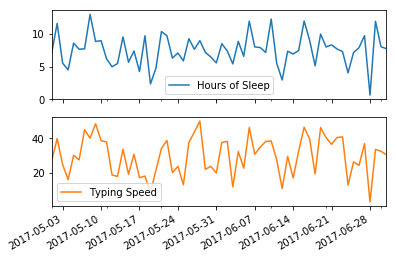

In [13]:
df1= pd.DataFrame({'Hours of Sleep': sleep_hours,
                    'Typing Speed': typing_speed_collection},
                    index=collection_dates)
df1.plot(kind='line', rot=30, subplots=True)

Notice the differences between the uncorrelated and correlated graphs! Notice how the correlated graphs follow a similar trend. As a bonus challenge, try creating similar plots for other sets of data. Also, feel free to play around with more kinds of data distributions!

As a quick aside, let us go over how to import real data to create those plots, since you will be bringing in your own data. Your data will be in some kind of a spreadsheet. Save that file as a .csv (comma seperate values) file. This will make it easy to manipulate using Python. All we need to do is convert that csv into a dataframe file. Then, we can use all the plotting functions that we just used. 

## Using your own data

Try it out with your own file! Make up random data if you don't have a file already and export it to a CSV format.

To upload your data make sure you're in the directory with the green notebook:

![image](img/upload.png)

Click the "Upload" button and upload your CSV. You should see it appear in the directory:

![image](img/uploaded.png)

Now you put the name of your file in the cell below and delete the hash tags in front of the two bottom lines:

In [14]:
your_file = "my-file-name.csv" # Make sure that your desired csv is in the same folder as this notebook.
#csv_df = pd.read_csv(your_file)  # delete the first hash tag of this line!
#csv_df  # delete the first hastag of this line!

Doing all this analysis with Python's built in libraries is awesome! 

Now let's look at how we can form similar plots using the Bokeh visualization library imported from earlier! In the next few cells, we use Bokeh's inbuilt plotting functions to create powerful graphs.

In [15]:
def datetime(x): #This function helps convert the x-axis values to dates to make plotting easier
    return np.array(x, dtype=np.datetime64)

a = figure(x_axis_type="datetime", title="Hours of Sleep in May and June")
a.grid.grid_line_alpha = 0.7
a.xaxis.axis_label = 'Date'
a.yaxis.axis_label = 'Hours of Sleep'

a.line(datetime(collection_dates), df['Hours of Sleep'], color='#0000FF', legend='Hours')
a.legend.location = "top_left"

show(a) #This opens up our plot in a new tab

In a similar fashion to before, we can plot both time series on one graph. We can use a similar process as the previous cell. However in this case, we just add an extra line for our other column of data. We also change the title of the graph.

In [16]:
a.line(datetime(collection_dates), df['Number of Pullups'], color='#7FF000', legend="Pullups")
a.title.text = "Sleep vs # of Pullups"
a.yaxis.axis_label = ''

show(a) #You may get a red error message after you run this cell, but ignore it. As long as this plot opens in the new tab, you are fine

Now, let us create a subplot like before! We use a similar process as the last two cells to create the two plots again. Then, we use the built in column function in Bokeh to put the two plots in an aligned vertical column to create nice subplots.

In [17]:
c = figure(x_axis_type="datetime", title="Hours of Sleep in May and June")
c.grid.grid_line_alpha=0.7
c.xaxis.axis_label = 'Date'
c.yaxis.axis_label = 'Hours of Sleep'

c.line(datetime(collection_dates), df['Hours of Sleep'], color='#0000FF', legend='Hours')
c.legend.location = "top_left"

In [18]:
d = figure(x_axis_type="datetime", title="# of Pullups")
d.grid.grid_line_alpha=0.7
d.xaxis.axis_label = 'Date'
d.yaxis.axis_label = 'Pullups'

d.line(datetime(collection_dates), df['Number of Pullups'], color='#7FF000', legend='Hours')
d.legend.location = "top_left"

In [19]:
show(column(c,d))

As you can see from our results, the Bokeh plots have a great deal of built in functionality! You are able to easily pan and box zoom on the created Bokeh plots. Additionally, saving to PNG with Bokeh is extremely easy! Simply click the save button. We will go over saving to PNG with the built-in Python libraries in the cells below.

As a review, we have provided you with two unique ways to create powerful plots in Python! Experiment with both, and learn their pros and cons!

## Saving to PNG

To save the figure, we have to assign it first to a variable, then we'll just call the `savefig` method.

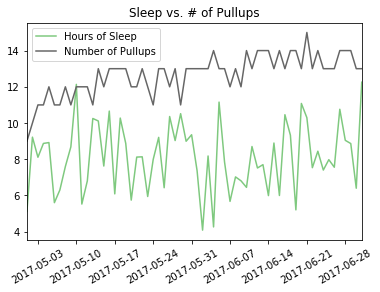

In [20]:
ax = df.plot(kind='line', rot=30, title='Sleep vs. # of Pullups', colormap="Accent")
fig = ax.get_figure()
fig.savefig('sleep-vs-pullups.png')

OK. But when we look at the output, it's quite poor quality, and it's cutting off our x-axis labels! How can we fix this?

**HINT:** Look at the `tight_layout` method and the `DPI` parameter [here](https://matplotlib.org/api/pyplot_api.html)

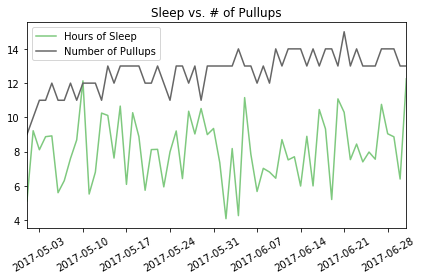

In [21]:
## CHALLENGE


## SOLUTION
ax = df.plot(kind='line', rot=30, title='Sleep vs. # of Pullups', colormap="Accent")
fig = ax.get_figure()
fig.tight_layout()  # makes PNG formatted better
fig.savefig('sleep-vs-pullups.png', dpi=1000)

Now that we've got everything charted nicely, let's see if we can detect any relationships in our data.

## Correlation

One of the most common and basic measures of correlation in [Pearson's `r`](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient), which is defined as:

$$ r = \frac{n (\sum{xy})-(\sum{x})(\sum{y})}{\sqrt{ [n \sum{x^2}-(\sum{x})^2 ][n \sum{y^2}-(\sum{y})^2 }]} $$

where `x` and `y` are two variables.

If we're looking at hours of sleep and pullups, we can calculate Pearson's `r` with the `scipy` library:

In [22]:
from scipy.stats.stats import pearsonr  

r1 = pearsonr(df['Number of Pullups'], df['Hours of Sleep'])
r2 = pearsonr(df1['Typing Speed'], df1['Hours of Sleep'])
print(r1)
print(r2)

(0.064229406112656276, 0.61992044469706764)
(0.77101888832430776, 2.2909605431239373e-13)


If you look at the [documentation](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pearsonr.html) for `pearsonr`, you'll see it is returning first `r`, or the correlation coefficient, and secondly a 2-tailed p-value.

## Interpretation

In terms of correlation interpretation, the values calculated above come in handy. Pearson's r takes on a value between +1 and −1, where 1 is total positive linear correlation, 0 is no linear correlation, and −1 is total negative linear correlation. The p-value helps us see the statistical significance of our results. A p-value closer to 0 (less than .05) means that our data is more significant. If the p-value is greater than .05, it indicates our data is less signficant. Note the differences between the correlated and uncorrelated data. Namely, the R value is closer to one for the correlated data, and the p value is smaller. Keep in mind that our correlated data is a crude, dummy model, so the values may not be as strong as they would be in real correlated data.

So it looks like here there is no correlation whatsoever between sleep and pullups. This make sense, because sleep never changed from the normal distribution, while pullups slowly logarithmically increased. Moreover, number of pullups, initially, is probably more related to training. You might get some progress at the begining, but will level off if nothing else changes (hence the logarithmic scale).

Post the plot image, your correlation number, and your conclusion about the nature of your phenomena to the course assets. Review and discuss the observations of other students. Remeber that your or your peers data could be real or fake, and that your conclusion could be reasonable, humorous or lyrical. 

## Prediction

If our pullup data wasn't randomly generated, we could also build a model to predict how many pullups we might get in the future. Let's try for the sake of demonstration.

We'll first fit our pullups to a simple linear OLS model using `scipy` and the `curve_fit` method:

In [23]:
import scipy

# define linear OLS function
def linear_func(x, a, b):
    return a*x + b

# fit function to data
popt, pcov = scipy.optimize.curve_fit(linear_func,  range(62),  df['Number of Pullups'])  # range for number of days

Looking at `popt` gives us the optimized parameters for the defined function (`a`, and `b`):

In [24]:
popt

array([  0.04635995,  11.24731183])

Now we can define a new range we want to predict on, let's do 100 more days:

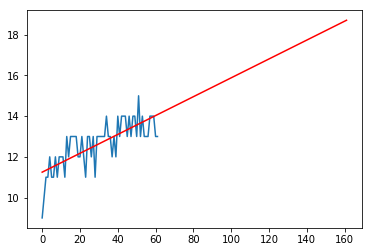

In [25]:
x_new = range(0,162)

# plot collected data
plt.plot(range(62), df['Number of Pullups'])

# plot fitted curve
plt.plot(x_new, linear_func(x_new, *popt), 'r-', label='fit')

It's hard to tell, but we can see that a linear model does not fit a logarithmic curve very well. Let's try defining a log function instead:

Optimized parameters:  [ 0.65395836  9.70420849  0.51611729]



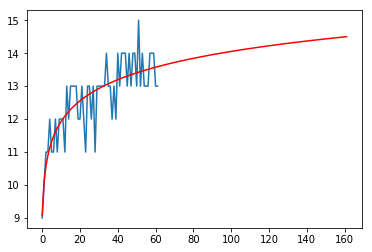

In [26]:
def log_func(x, a, b,c):
    return a*np.log2(c+x)+b

popt, pcov = scipy.optimize.curve_fit(log_func,  range(62),  df['Number of Pullups'])

print("Optimized parameters: ", popt)
print()

plt.plot(range(62), df['Number of Pullups'])
plt.plot(x_new, log_func(x_new, *popt), 'r-', label='fit')

That looks a little better, so if we continued for another 100 days, we'd hit a steady average of 14.5 pullups, not bad!